Let's generetate two correlated 1D Tensors

In [1]:
import torch
import numpy as np

n = 2000
d = 1
X = torch.tensor(np.random.multinomial(1, [1/3.]*3, n).dot([-1,0,1])).float()
#You can add some extra noise if wanted
Y = X**2 # + torch.tensor(np.random.normal(0,1,n)).float()

and visualize an estimation of their standardized joint density 

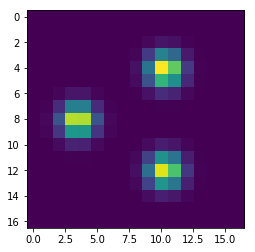

In [3]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))
import matplotlib.pylab as plt

from facl.independence.density_estimation.pytorch_kde import kde
from facl.independence.hgr import _joint_2

density = _joint_2(X, Y, kde)
plt.imshow(density)

HGR estimation is able to detect the dependancy (recall 0 means no dependance and 1 complete determination). Also note that the computation are made on the kde estimates while when one of the variable is discrete it is possible to make use of it to reduce dimensionality of the kernel density estimation. Contact us if you need this.  

In [4]:
from facl.independence.hgr import chi_2, hgr
print( "HGR estimation by Wittenhausein: {:.3f} \nChi square upper bound: {:.3f} ".format(  hgr(X, Y, kde), chi_2(X, Y, kde).sqrt() ))

HGR estimation by Wittenhausein: 0.963 
Chi square upper bound: 0.963 


While the peason fails to detect correlation

In [5]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(X.numpy(), Y.numpy())
print( "Pearson correlation {:.3f}".format(corr))

Pearson correlation -0.019
